#### 查看启动环境

In [9]:
import sys,os
print (sys.executable)
print (sys.path)
print (os.getcwd())

e:\pyenvdata\jupyterlabenv38\scripts\python.exe
['E:\\worksrc\\ufile-client', 'D:\\Python38\\python38.zip', 'D:\\Python38\\DLLs', 'D:\\Python38\\lib', 'D:\\Python38', 'e:\\pyenvdata\\jupyterlabenv38', '', 'e:\\pyenvdata\\jupyterlabenv38\\lib\\site-packages', 'e:\\pyenvdata\\jupyterlabenv38\\lib\\site-packages\\win32', 'e:\\pyenvdata\\jupyterlabenv38\\lib\\site-packages\\win32\\lib', 'e:\\pyenvdata\\jupyterlabenv38\\lib\\site-packages\\Pythonwin', 'e:\\pyenvdata\\jupyterlabenv38\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Administrator\\.ipython']
E:\worksrc\ufile-client


In [10]:
import requests
import hashlib,json

print (requests)
print ( help(display) )

<module 'requests' from 'e:\\pyenvdata\\jupyterlabenv38\\lib\\site-packages\\requests\\__init__.py'>
Help on function display in module IPython.core.display:

display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)
    Display a Python object in all frontends.
    
    By default all representations will be computed and sent to the frontends.
    Frontends can decide which representation is used and how.
    
    In terminal IPython this will be similar to using :func:`print`, for use in richer
    frontends see Jupyter notebook examples with rich display logic.
    
    Parameters
    ----------
    objs : tuple of objects
        The Python objects to display.
    raw : bool, optional
        Are the objects to be displayed already mimetype-keyed dicts of raw display data,
        or Python objects that need to be formatted before display? [default: False]
    include : list, tuple or set, optional
        A list of format type strings (MI

In [11]:
UFILE_SERVER =  'http://192.168.50.162:18001'
UFILE_APPIMG_SERVER =  'http://192.168.50.162:18010'

FILENAME_EXAMPLE = 'big.jpg'

# 慎用！！！
hiapi_password='7f3b311ecc4e8b47c14a9cb45ae639cd'  # 高级系统管理密码
admin_password='5c51aa76ac03474b197493922f25ab6b'  # 管理功能密码  


def get_file_sha1(filepath):
    """
    获取文件的 sha1 码
    """
    calc_sha1_obj = hashlib.new('sha1')
    if os.path.exists(filepath):
        with open(filepath,"rb") as fhandle:
            calc_sha1_obj.update( fhandle.read() )
            return calc_sha1_obj.hexdigest()
    raise FileNoFound()

file_example_sha1 = get_file_sha1(FILENAME_EXAMPLE)
assert file_example_sha1 == '27becec9d8b6a578881c0560363e6c1d03fdcd1d'
print (file_example_sha1)    

27becec9d8b6a578881c0560363e6c1d03fdcd1d


In [12]:
from IPython.display import Image
print ( help(Image) )

#display(Image(FILENAME_EXAMPLE)  )



Help on class Image in module IPython.core.display:

class Image(DisplayObject)
 |  Image(data=None, url=None, filename=None, format=None, embed=None, width=None, height=None, retina=False, unconfined=False, metadata=None)
 |  
 |  An object that wraps data to be displayed.
 |  
 |  Method resolution order:
 |      Image
 |      DisplayObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, url=None, filename=None, format=None, embed=None, width=None, height=None, retina=False, unconfined=False, metadata=None)
 |      Create a PNG/JPEG/GIF image object given raw data.
 |      
 |      When this object is returned by an input cell or passed to the
 |      display function, it will result in the image being displayed
 |      in the frontend.
 |      
 |      Parameters
 |      ----------
 |      data : unicode, str or bytes
 |          The raw image data or a URL or filename to load the data from.
 |          This always results in embedded image 

#####  info 查看信息

In [13]:
def test_info():
    info_url = '{server_url}/ufile/api/info/{file_example_sha1}'.format(server_url = UFILE_SERVER,file_example_sha1=file_example_sha1)
    print (info_url)
    r = requests.get(info_url)
    print ( r.json() )

def test_upload():
    upload_url =  '{server_url}/ufile/up/{file_example_sha1}'.format(server_url=UFILE_SERVER,file_example_sha1=file_example_sha1)
    print(upload_url)

    files = {'ufile_upload': (FILENAME_EXAMPLE, open(FILENAME_EXAMPLE, 'rb'))  }
    r = requests.post(upload_url,files=files)
    print ( r.json() ) 
    
def test_delete():
    delete_url = "{server_url}/ufile/api/admin_delete/{file_example_sha1}?admin_password={admin_password}".format(server_url=UFILE_SERVER,file_example_sha1=file_example_sha1,admin_password=admin_password)
    print (delete_url)
    r = requests.get(delete_url)
    print ( r.json() ) 
        

In [15]:
test_upload()

http://192.168.50.162:18001/ufile/up/27becec9d8b6a578881c0560363e6c1d03fdcd1d
{'status_code': 200, 'sha1': '27becec9d8b6a578881c0560363e6c1d03fdcd1d', 'request': '/ufile/up/27becec9d8b6a578881c0560363e6c1d03fdcd1d'}


In [16]:
test_info()

test_upload()
test_info()

#test_delete()
#test_info()

#test_upload()
#test_info()



http://192.168.50.162:18001/ufile/api/info/27becec9d8b6a578881c0560363e6c1d03fdcd1d
{'info': [{'mimetype': 'image/jpeg', 'length': 1115036, 'sha1': '27becec9d8b6a578881c0560363e6c1d03fdcd1d', 'createtime': '1611282369', 'filename': 'big.jpg'}], 'status_code': 200, 'request': '/ufile/api/info/27becec9d8b6a578881c0560363e6c1d03fdcd1d'}
http://192.168.50.162:18001/ufile/up/27becec9d8b6a578881c0560363e6c1d03fdcd1d
{'sha1': '27becec9d8b6a578881c0560363e6c1d03fdcd1d', 'status_code': 200, 'error_message': 'file exist,need not upload', 'request': '/ufile/up/27becec9d8b6a578881c0560363e6c1d03fdcd1d', 'error_info': {'calc_sha1': '', 'id': '1611282410'}, 'error_code': 0}
http://192.168.50.162:18001/ufile/api/info/27becec9d8b6a578881c0560363e6c1d03fdcd1d
{'info': [{'mimetype': 'image/jpeg', 'length': 1115036, 'sha1': '27becec9d8b6a578881c0560363e6c1d03fdcd1d', 'createtime': '1611282369', 'filename': 'big.jpg'}], 'status_code': 200, 'request': '/ufile/api/info/27becec9d8b6a578881c0560363e6c1d03fdcd

#### imgsrv app test

http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=fit&w=300&h=300


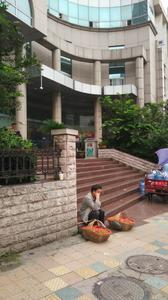

http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=crop&w=300&h=300


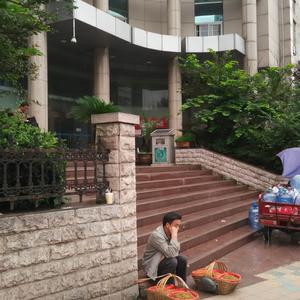

http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=pad&w=300&h=300&b=ff0000


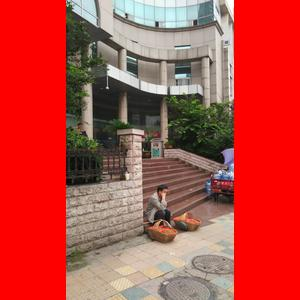

http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=reshape&w=300&h=300


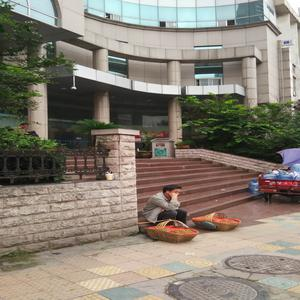

In [7]:
MODE_FIT =  'fit'           # keep scale
MODE_CROP = 'crop'          # cut
MODE_PAD =  'pad'           # keep scale , draw background
MODE_RESHAPE = 'reshape'    # no background ,lost scale

# 原始尺寸 w2368  h4208

width = 300
height = 300
url_test_templ = '{server_url}/ufile/app/imgsrv/resize/{file_example_sha1}?m={mode}&w={width}&h={height}'

# FIT ,  维持原比例，并根据原文件尺寸决定 实现 宽度 高度 中的一个

mode = MODE_FIT
url_test = url_test_templ.format(server_url=UFILE_APPIMG_SERVER,file_example_sha1=file_example_sha1,mode=mode,width=width,height=height)
print (url_test)
display(Image(url_test,format='jpg'))


# crop  会裁剪
mode = MODE_CROP
url_test = url_test_templ.format(server_url=UFILE_APPIMG_SERVER,file_example_sha1=file_example_sha1,mode=mode,width=width,height=height)
print (url_test)
display(Image(url_test,format='jpg'))

# pad  维持比例，增加背景  b = RGB  
mode = MODE_PAD
url_test = url_test_templ.format(server_url=UFILE_APPIMG_SERVER,file_example_sha1=file_example_sha1,mode=mode,width=width,height=height)
url_test = url_test + '&b=ff0000'
print (url_test)
display(Image(url_test,format='jpg'))

# reshape  变形
mode = MODE_RESHAPE
url_test = url_test_templ.format(server_url=UFILE_APPIMG_SERVER,file_example_sha1=file_example_sha1,mode=mode,width=width,height=height)
print (url_test)
display(Image(url_test,format='jpg'))


SyntaxError: invalid syntax (<ipython-input-8-dfa9bf814aa0>, line 1)

In [17]:
display('http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=reshape&w=300&h=300','JPG')

'http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=reshape&w=300&h=300'

'JPG'

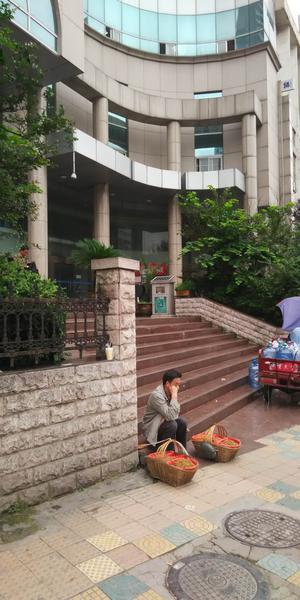

In [18]:
display(Image('http://192.168.50.162:18010/ufile/app/imgsrv/resize/27becec9d8b6a578881c0560363e6c1d03fdcd1d?m=reshape&w=300&h=600',format='jpg'))